In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import helper as h
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv');
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
edu_types = df['EducationTypes'].value_counts().reset_index()
edu_types.head()

,index,EducationTypes
0,Self-taught,3691
1,Online course; Self-taught,1875
2,Self-taught; Open source contributions,1751
3,On-the-job training; Self-taught,1687
4,Online course; On-the-job training; Self-taught,1276


In [18]:
edu_types.rename(columns = {'index':'Method','EducationTypes':'Count'}, inplace = True)
edu_types.head()

,Method,Count
0,Self-taught,3691
1,Online course; Self-taught,1875
2,Self-taught; Open source contributions,1751
3,On-the-job training; Self-taught,1687
4,Online course; On-the-job training; Self-taught,1276


In [8]:
split_eduTypes = df["EducationTypes"].str.split("; ")
split_eduTypes = split_eduTypes.dropna()
all_vals = []
for m in split_eduTypes:
    for method in m:
        if all_vals.count(method) == 0 :
            all_vals.append(method)
all_vals

['Online course',
 'Open source contributions',
 'Self-taught',
 'Hackathon',
 'Coding competition',
 'Part-time/evening course',
 'On-the-job training',
 'Bootcamp',
 'Industry certification']

In [10]:
edu_types = df['EducationTypes'].value_counts().reset_index()
edu_types.rename(columns = {'index':'Method','EducationTypes':'count'}, inplace = True)
edu_types_df = h.total_count(edu_types, 'Method', 'count', all_vals)
edu_types_df

,Method,count
2,Self-taught,27330
0,Online course,13792
6,On-the-job training,12508
1,Open source contributions,11225
3,Hackathon,7150
4,Coding competition,6683
5,Part-time/evening course,4654
8,Industry certification,4472
7,Bootcamp,2727


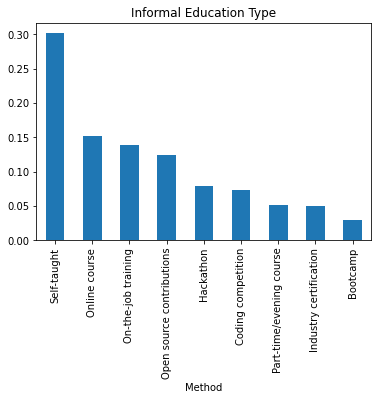

In [22]:
def clean_and_plot(df, title='Informal Education Type', plot=True):
    '''
    INPUT 
        df - a dataframe holding the EducationTypes column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    edu_types = df['EducationTypes'].value_counts().reset_index()
    edu_types.rename(columns = {'index':'Method','EducationTypes':'count'}, inplace = True)
    edu_types_df = h.total_count(edu_types, 'Method', 'count', all_vals)

    edu_types_df.set_index('Method', inplace=True)
    if plot:
        (edu_types_df/edu_types_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = edu_types_df/edu_types_df.sum()
    return props_study_df

props_df = clean_and_plot(df)

In [6]:
country_nan = df['Country'].isnull().mean()
careerSat_nan = df['CareerSatisfaction'].isnull().mean()
country_nan, careerSat_nan

(0.0, 0.16922867372353673)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Country'>

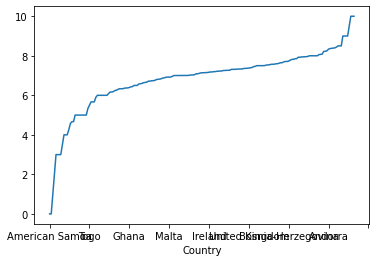

In [13]:
careerSat_rm = df.dropna(subset=['CareerSatisfaction'], how='any')
careerSat_df = careerSat_rm.groupby('Country').mean()['CareerSatisfaction'].sort_values()
careerSat_df.plot()

In [47]:
# Filtered the data so it only contains the survey result from the top 30 country based on the total respondents
careerSat_df = df.dropna(subset=['CareerSatisfaction'], how='any')
top_40_country = list(careerSat_df['Country'].value_counts().head(50).index)
aggregated_data = filtered_developer_data.groupby(['Country','CareerSatisfaction'], as_index=False)['Respondent'].count()
total_respondents_per_country = careerSat_df['Country'].value_counts()
aggregated_data['Respondent Percentage'] = aggregated_data \
                                           .apply(lambda x: x['Respondent'] / total_respondents_per_country[x['Country']], axis=1) \
                                           .round(3)
aggregated_data = aggregated_data[['Country', 'CareerSatisfaction', 'Respondent Percentage']]
#pivoted_data = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Country', columns='CareerSatisfaction', fill_value=0)
pivoted_data = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Country', columns='CareerSatisfaction', fill_value=0) \
                 .sort_values(10, ascending=False)
pivoted_data

CareerSatisfaction,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Country,,,,,,,,,,,
Mexico,0.000,0.000,0.000,0.013,0.013,0.020,0.039,0.121,0.291,0.190,0.314
Pakistan,0.026,0.020,0.003,0.050,0.050,0.082,0.108,0.169,0.201,0.093,0.198
Iran,0.012,0.010,0.010,0.030,0.052,0.098,0.105,0.162,0.188,0.142,0.190
Israel,0.010,0.002,0.010,0.014,0.006,0.030,0.059,0.184,0.311,0.186,0.188
Bulgaria,0.004,0.000,0.004,0.027,0.027,0.089,0.161,0.219,0.205,0.098,0.165
Philippines,0.024,0.012,0.016,0.029,0.073,0.106,0.118,0.176,0.184,0.102,0.159
United States,0.005,0.003,0.009,0.015,0.023,0.055,0.086,0.206,0.274,0.172,0.152
Canada,0.004,0.002,0.005,0.016,0.019,0.047,0.093,0.223,0.294,0.157,0.139
Argentina,0.004,0.000,0.000,0.018,0.031,0.048,0.115,0.242,0.286,0.119,0.137


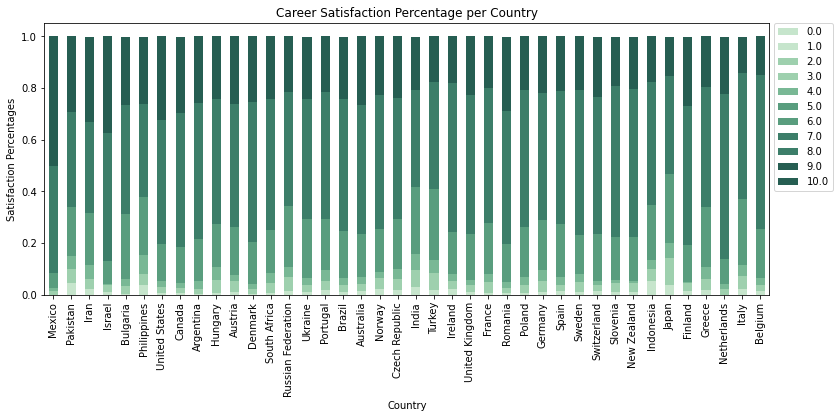

In [48]:
# Visualize the data
pivoted_data.plot(kind='bar', 
                  stacked=True, 
                  colormap=ListedColormap(sns.color_palette("ch:2.5,-.2,dark=.3")),
                  figsize=(13,5))
plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('Satisfaction Percentages')
plt.title('Career Satisfaction Percentage per Country')
plt.show()
